In [1]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf     
import matplotlib.pyplot as plt

In [2]:
end = dt.date.today()
start = end - dt.timedelta(days=365*10)
start_date =  start.strftime('%Y-%m-%d')
end_date =  end.strftime('%Y-%m-%d')


In [3]:
stock_list = ["AAPL", "MSFT", "GOOG", "AMZN", "FB"]
print("Select a stock from the following list:")
print(stock_list)
selected_stock = input("Enter the symbol of the stock: ")

stocks = ["SPY", selected_stock]

yf.pdr_override()
stock_data = pdr.get_data_yahoo(stocks, start_date, end_date)['Adj Close']
stock_data.tail()


Select a stock from the following list:
['AAPL', 'MSFT', 'GOOG', 'AMZN', 'FB']


Enter the symbol of the stock:  AAPL


[*********************100%***********************]  2 of 2 completed


,AAPL,SPY
Date,,
2023-02-02,150.820007,416.779999
2023-02-03,154.500000,412.350006
2023-02-06,151.729996,409.829987
2023-02-07,154.649994,415.190002
2023-02-08,151.919998,410.649994


Please choose a window size from the following options:
1. 15 days
2. 30 days
3. 90 days
4. 180 days


Enter your choice:  4


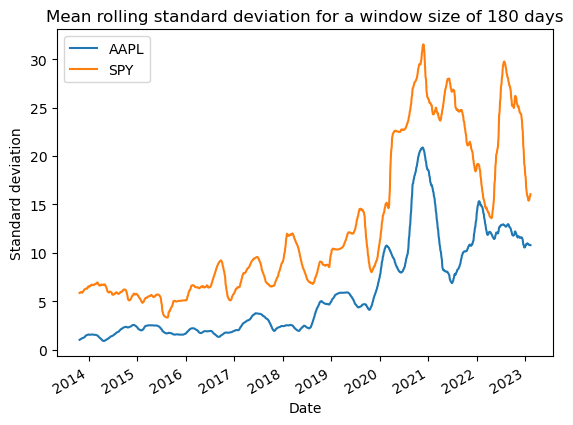

In [4]:
window_sizes = [15, 30, 90, 180]

print("Please choose a window size from the following options:")
for n, size in enumerate(window_sizes):
    print(f"{n+1}. {size} days")

choice = int(input("Enter your choice: "))

window = window_sizes[choice-1]
rolling_std = stock_data.rolling(window=window).std()
grouped_data = rolling_std.groupby(level=0).mean()
grouped_data.plot(kind='line', title=f"Mean rolling standard deviation for a window size of {window} days")
plt.xlabel("Date")
plt.ylabel("Standard deviation")
plt.show()